# **Sexism in "Survivor"**

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

## Data Analysis

In [421]:
## Reading all the inputted datasets
idols = pd.read_csv('idols_found.csv', skiprows = [86,87,88,89,90], usecols = [0,1,2,3])
ind_imm = pd.read_csv('individual_immunity.csv', header = 1, skiprows = [203,204,205,206,207,208,209,210], usecols = [1,2,3,4,5,6])
f4fire = pd.read_csv('final_4_fire.csv', header = 1, usecols = [1,2,3,4,5,6])
conf_winners = pd.read_csv('conf_counts_winners.csv', header = 1, usecols = [1,2,3,4,5])
votes_FTC = pd.read_csv('votes_Final_Tribal_Council.csv', header = 1, skiprows = [82,83,84], usecols = [1,2,3,4,5,6,7,8])
## I had to strategically use the header, skiprows, and usecols parameters to trim specific sections of each spreadsheet

### Preliminary Data Cleaning and Organizing

In [303]:
## Change Male and Female to Man and Woman
ind_imm = ind_imm.replace(to_replace={'Male', 'Female'}, value={'Man', 'Woman'})

## Change "Sex" to "Gender"
ind_imm = ind_imm.rename(columns={"Sex": " Gender"})

## Change "Count" to "Count (Women)"
ind_imm = ind_imm.rename(columns={"Count": "Count (Women)"})
## Actually I like "Women Count" as a better name
ind_imm = ind_imm.rename(columns={"Count (Women)": "Women Count"})

In [304]:
## Change "M/F" to "M/W" for Man/Woman instead of Male/Female
f4fire = f4fire.rename(columns={"M/F": "M/W"})
## Actually "M/W" kind of looks weird. So I'll do "Man/Woman" instead
f4fire = f4fire.rename(columns={"M/W": "Man/Woman"})

## Change "F" for "Female" to "W" for "Woman"
f4fire = f4fire.replace(to_replace={'W'}, value={'Woman'})
## Actually, just make "M" and "W" into "Man" and "Woman" respectively
f4fire = f4fire.replace(to_replace={'W'}, value={'Woman'})
f4fire = f4fire.replace(to_replace={'M'}, value={'Man'})

In [305]:
## Change "M/F" to "M/W" for Man/Woman instead of Male/Female
idols = idols.rename(columns={"M/F": "M/W"})
## And then change that to "M/W Count"
idols = idols.rename(columns={"M/W": "M/W Count"})

In [336]:
## Need to add a Man/Woman column to the conf_winners dataset
## There are more Men that have won than Women, so it is easier to make them all "Man" and change some to "Woman"
conf_winners["Gender"] = "Man"
## Make an array of the indices of the Women winners
women_indices = np.array([8,14,15,16,17,24,26,28,29,32,33,34,36,37,39])
## Change those indices to have a Gender of "Woman"
conf_winners.loc[women_indices, "Gender"] = "Woman"

## Change the Natalie's to "Natalie A" and "Natalie W". They are different people.
conf_winners.loc[24, 'Winner'] = "Natalie A"
conf_winners.loc[39, 'Winner'] = "Natalie W"

#### Now that we are done the preliminary setup, let's do some analysis! Of data! Data analysis if you will

### Let's start with the Winner Confessionals Dataset

In [337]:
women_winners = conf_winners.groupby('Gender').size()["Woman"] ## number of women winners
men_winners = conf_winners.groupby('Gender').size()["Man"] ## number of men winners
total_women_conf = conf_winners.groupby('Gender')['# of Confessionals'].sum()["Woman"] ## total confessionals by winning women
total_men_conf = conf_winners.groupby('Gender')['# of Confessionals'].sum()["Man"] ## total confessionals by winning men
avg_women_conf = conf_winners.groupby('Gender')['# of Confessionals'].mean()["Woman"] ## average confessionals by winning women
avg_men_conf = conf_winners.groupby('Gender')['# of Confessionals'].mean()["Man"] ## average confessionals by winning men

In [286]:
men_winners, women_winners

(25, 15)

We can see there are more men that have won (25) than women that have won (15).

In [287]:
total_men_conf, total_women_conf

(1484, 639)

The total confessionals don't mean a ton on their own, but that is way more by men (over double of women).

In [288]:
avg_men_conf, avg_women_conf

(59.36, 42.6)

In [134]:
avg_men_conf - avg_women_conf ## difference between averages

16.759999999999998

Wow now this is something. On average, a man that wins a season gets almost 17 more confessionals than a woman that wins. 

In [130]:
((avg_men_conf/avg_women_conf) - 1)*100

39.34272300469483

Another way of putting it is that a man that wins gets 39.34% more confessionals than a woman that wins. That's a lot. 
For every 10 seconds a winning woman gets to tell of her story, a winning man gets almost 14 seconds. And in the grand scheme of a whole season, that becomes a considerable difference in who's perspective of the story is being told.

In [340]:
conf_winners.groupby('Gender')['# of Confessionals'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Man,25.0,59.36,18.891974,23.0,48.0,59.0,71.0,97.0
Woman,15.0,42.60,14.266845,15.0,34.5,43.0,53.5,69.0


This 5 number summary, plus frequency, mean, and standard deviation shows how men consistently have a considerable amount of more confessionals than women. But let's look at a boxplot of these numbers to see it more visually. 

[Text(0.5, 0, 'Gender'), Text(0, 0.5, '# of Confessionals')]

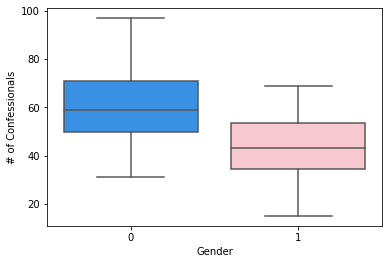

In [226]:
## Make array of confessional counts of women winners
women_array = np.array(conf_winners.loc[women_indices, "# of Confessionals"])

## Make array of confessional counts of men winners
men_indices = np.array([0,1,2,3,4,5,6,7,9,10,11,12,13,18,19,20,21,22,23,25,30,31,35])
men_array = np.array(conf_winners.loc[men_indices, "# of Confessionals"])

all_arrays = [men_array, women_array]

sns.boxplot(data = all_arrays, palette = ['dodgerblue', 'pink']).set(xlabel='Gender', ylabel='# of Confessionals')

We can see that the boxplot for confessionals by winning men (the blue one on the left) is generally much higher than the boxplot for confessionals by winning women. The median for women (43) is lower than men's Q1 (48), the Q3 for the women (53.5) is lower than the men's median (59), and the maximum for women (69) is around the men's Q3 (71). So, beyond just some tuples and numbers from before, we can see graphically that men who win just get more confessionals than women who win. 

Man           AxesSubplot(0.1,0.15;0.363636x0.75)
Woman    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

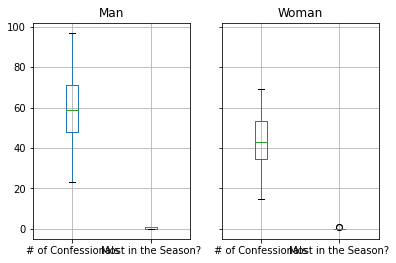

In [227]:
conf_winners.groupby('Gender').boxplot()

That was another way of doing a boxplot that I found, but it gets all jumbled on the bottom, it produces 2 separate graphs, and it does not have colors. I like the colors. 

In [278]:
men_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()["Man"]
women_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()["Woman"]
total_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()
total_most_conf

Gender
Man      13
Woman     2
Name: Most in the Season?, dtype: int64

There are 13 winning men who had the most confessionals in their season, but only 2 winning women who had the most confessionals in their season.

In [343]:
men_percent_most_conf = (men_most_conf / men_winners) * 100
women_percent_most_conf = round((women_most_conf / women_winners) * 100, 2)
men_percent_most_conf, women_percent_most_conf

(52.0, 13.33)

Another way to put it is that 52% of men who win have the most confessionals in their season, while only 13.33% of women who win have the most in their season. Men who win are given a much larger piece of the narrative and get to tell their story more.

### Now let's find trends in the Idols Found dataset

In [349]:
total_idols = idols['# of Idols Found'].sum()
idols_per_season = total_idols / 30 ## The hidden immunity idol was introduced in Season 11, so there have been 30 seasons with it
idols_per_season

4.233333333333333

There are about 4.2 hidden immunity idols found per season. This number helps set up some context for later numbers.

In [308]:
women_idols = idols['M/W Count'].sum()
men_idols = total_idols - women_idols
men_idols, women_idols

(90, 37)

We can see that men find many more idols than women, by a gigantic margin. 

In [316]:
men_idols_percent = men_idols / total_idols
women_idols_percent = women_idols / total_idols
men_idols_percent, women_idols_percent

(0.7086614173228346, 0.29133858267716534)

Men have found just under 71% of all idols while women have only found 29% of all idols. 

In [310]:
men_idols / women_idols

2.4324324324324325

For every 1 idol a woman finds, a man finds about 2.43 idols on average. That is a huge disparity and men clearly have an advantage when it comes to finding hidden immunity idols.

But let's do a statistical test to see if these numbers are statistically significant. We can do a binomial test with p=.5, n=127, and # of successes = 90. This represents the 90 idols men have found, out of 127 total, and if that is significantly beyond an even 50/50 probability of a man and woman having the same odds of finding an idol. And the significance value = .05

In [325]:
stats.binom_test(90, n=127, p=0.5)

2.872030486807263e-06

We can see that if the probability was 50% for men to find an idol, then it is almost impossible for men to find this many idols. This is well under the significance value of .05, so we can conclude this is statistically significant. As in, the number of idols men have actually found is well beyond men and women each having an even 50% chance of finding an idol. So we can see that this is not equal and men have a significant advantage in finding hidden immunity idols.  

In [330]:
stats.binom_test(90, n=127, p=0.6)

0.01414576527359386

Even if we were to say men have a slight advantage in finding idols, so the probability is 60% for men, then still the numbers are still statistically significant with a significance value = .05. As in, men have significantly above a 60% chance of finding an idol, which becomes far from being equal.

### Let's also look at trends in the Individual Immunity Challenge Wins dataset

In [348]:
total_ind_imm = ind_imm['# of Immunity Challenges Won'].sum()
ind_imm_per_season = total_ind_imm / 40 ## There have been individual immunity challenges in all 40 seasons of Survivor
ind_imm_per_season

8.65

There are an average of 8.65 individual immunity challenges per season, which helps contextualize some other numbers we will look at. 

In [353]:
women_ind_imm = ind_imm['Women Count'].sum()
men_ind_imm = total_ind_imm - women_ind_imm
men_ind_imm, women_ind_imm

(215, 131)

Men have won a total of 215 individual immunity challenges throughout the history of the show while women have won 131, which is far less. 

In [366]:
men_indimm_avg = men_ind_imm / 40
women_indimm_avg = women_ind_imm / 40
men_indimm_avg, women_indimm_avg 

(5.375, 3.275)

Averaging for all 40 seasons, men win just over 2 more challenges per season than women, which becomes a large disparity when there are 40 seasons! 

In [354]:
men_indimm_percent = men_ind_imm / total_ind_imm
women_indimm_percent = women_ind_imm / total_ind_imm
men_indimm_percent, women_indimm_percent

(0.6213872832369942, 0.3786127167630058)

We can see that men win about 62.14% of individual immunity challenges, while women win about 37.86%. This seems to be well beyond an equal 50/50 odds, but let's do another binomial test for significance.

Similar to the binomial test for the Idols, we will set p=.5, n=346, and # of success = 215 with a significance level of .05. These represent 50% odds of a man winning a challenge, the 346 total individual immunity challenge wins, and the 215 wins by men. So let's find the probability of men winning that many challenges. 

In [356]:
stats.binom_test(215, n=346, p=0.5)

7.364729817165011e-06

This probabiliy is far below our significance level of .05, which means men have won significantly more challenges than women. Which means the odds of winning a challenge for men are well above 50%. So, this is another category of the game where men have a noticeable advantage over women.

When men are finding significantly more idols than women and are winning considerably more challenges than women, these are more opportunities of power in the game of Survivor that are going to men. When a player plays an idol or possesses the immunity necklace (from winning an individual immunity challenge), that player is safe from receiving any votes for elimination. So, men having these advantages in the game directly helps them survive longer and gives them a higher chance to make it to Final Tribal Council, which is where the jury votes on the last 2/3 players remaining on who should win the game.

### Let's look at the breakdown of votes, by gender, at Final Tribal Council 

In [364]:
men_votes = int(votes_FTC['Total Votes for Men'].sum())
women_votes = int(votes_FTC['Total Votes for Women'].sum())
men_votes, women_votes

(212, 127)

In the history of the show, men have received 212 votes to win at a final tribal council, while women have only received 127.

In [369]:
total_votes = men_votes + women_votes
men_FTC = int(votes_FTC['# of Men'].sum()) ## total number of men to appear in Final Tribal Council (FTC)
women_FTC = int(votes_FTC['# of Women'].sum()) ## total number of women to appear in FTC
men_FTC, women_FTC

(54, 51)

Despite there being almost the same amount of men (54) and women (51) to appear in a FTC, men have 85 more FTC votes to win than women do. Let's get the average amount of votes received per player, grouped by gender. 

In [371]:
votes_per_woman = women_votes / women_FTC
votes_per_man = men_votes / men_FTC
votes_per_man, votes_per_woman

(3.925925925925926, 2.4901960784313726)

Each man that appears in a FTC receives almost 4 votes on average, while each woman receives about 2.5 votes. 

In [382]:
votes_FTC.describe()

,Season,# of Men,# of Women,Total Votes for Men,Total Votes for Women
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,1.350000,1.275000,5.300000,3.175000
std,11.690452,0.769615,0.715667,3.962646,3.185605
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,1.000000,1.000000,1.750000,0.000000
50%,20.500000,1.000000,1.000000,5.000000,2.000000
75%,30.250000,2.000000,2.000000,9.000000,7.000000
max,40.000000,3.000000,3.000000,13.000000,9.000000


In [381]:
votes_FTC[['Total Votes for Men', 'Total Votes for Women']].describe()

,Total Votes for Men,Total Votes for Women
count,40.000000,40.000000
mean,5.300000,3.175000
std,3.962646,3.185605
min,0.000000,0.000000
25%,1.750000,0.000000
50%,5.000000,2.000000
75%,9.000000,7.000000
max,13.000000,9.000000


Here is a 5-number summary, plus count, mean, and std of the 2 columns that have the most volatility in data (basically the other columns are not a very compelling 5-number summary). We can see in all but the min, the men get more votes at a FTC. 

<AxesSubplot:>

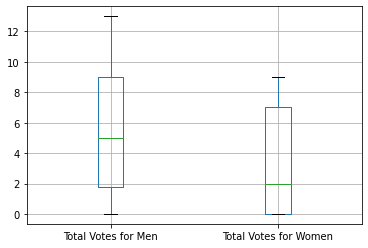

In [422]:
votes_FTC.boxplot(column=['Total Votes for Men', 'Total Votes for Women'])

There is an interesting trend of women getting 3rd place and receiving 0 votes. There are enough 0-vote-finalist women to make the Q1 still at 0. Meanwhile, the Q1 for men is 1.75 because of less 0-vote-finalists that are men. 

This dataset is mainly compelling because of its comparison of men versus women. So, the seasons where it is all men or all women in a FTC are not that interesting here. Because if there are all women competing in a FTC, then of course women will get all the votes and men will not get any, or vice versa. So, let's remove all rows with 0 men or 0 women at a FTC.

In [423]:
## Gives all the rows with 0 men or 0 women, which helps to make the list of the rows to remove
votes_FTC[(votes_FTC['# of Men'] == 0) | (votes_FTC['# of Women'] == 0)]

,Season,First,Second,Third,# of Men,# of Women,Total Votes for Men,Total Votes for Women
6,4.0,Vecepia,Neleh,NaN,0.0,2.0,0.0,7.0
8,5.0,Brian,Clay,NaN,2.0,0.0,7.0,0.0
12,7.0,Sandra,Lil,NaN,0.0,2.0,0.0,7.0
20,11.0,Dannie,Stephenie,NaN,0.0,2.0,0.0,7.0
30,16.0,Parvati,Amanda,NaN,0.0,2.0,0.0,8.0
34,18.0,JT,Stephen,NaN,2.0,0.0,7.0,0.0
40,21.0,Fabio,Chase,Sash,3.0,0.0,9.0,0.0
46,24.0,Kim,Sabrina,Chelsea,0.0,3.0,0.0,9.0
54,28.0,Tony,Woo,NaN,2.0,0.0,9.0,0.0
56,29.0,Natalie,Jaclyn,Missy,0.0,3.0,0.0,8.0


In [424]:
rows_to_drop = np.array([6,7,8,9,12,13,20,21,30,31,34,35,40,41,46,47,54,55,56,57])
## Note: Because of the quirky indices of the rows, each season has 2 rows, hence why I have to always count 2 indices in the array
votes_FTC = votes_FTC.drop(rows_to_drop)

Now that we are more directly looking at men versus women, let's look at this new data.

In [428]:
votes_FTC[['Total Votes for Men', 'Total Votes for Women']].describe()

,Total Votes for Men,Total Votes for Women
count,30.000000,30.000000
mean,6.000000,2.700000
std,3.695291,2.781094
min,0.000000,0.000000
25%,3.000000,0.000000
50%,5.500000,2.000000
75%,9.000000,4.000000
max,13.000000,9.000000


<AxesSubplot:>

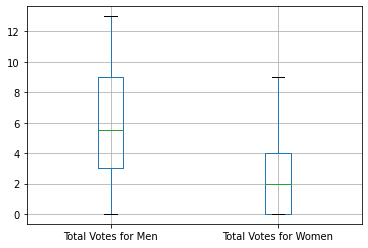

In [426]:
votes_FTC.boxplot(column=['Total Votes for Men', 'Total Votes for Women'])

We can see that when it is men versus women, the disparity is even larger. 